In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Examples

In [2]:
s = pd.Series(np.random.randn(4), name='daily return')

In [3]:
s

0   -1.572935
1   -0.673567
2    0.351698
3   -0.445493
Name: daily return, dtype: float64

In [4]:
s.describe()

count    4.000000
mean    -0.585074
std      0.791775
min     -1.572935
25%     -0.898409
50%     -0.559530
75%     -0.246195
max      0.351698
Name: daily return, dtype: float64

In [5]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']

In [6]:
s

AMZN   -1.572935
AAPL   -0.673567
MSFT    0.351698
GOOG   -0.445493
Name: daily return, dtype: float64

In [9]:
import urllib2

In [10]:
web_page = urllib2.urlopen('http://cnn.com')

In [11]:
web_page.next()

'<!DOCTYPE html><html class="no-js"><head><meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"><meta charset="utf-8"><meta content="text/html" http-equiv="Content-Type"><meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0"><link href="/favicon.ie9.ico" rel="Shortcut Icon" type="image/x-icon"/><link href="http://i.cdn.turner.com/cnn/.e/img/3.0/global/misc/apple-touch-icon.png" rel="apple-touch-icon" type="image/png"/><script>var CNN = CNN || {};CNN.pageTimer = {"interval":20,"isVisible":true,"pageType":"section","resetDelay":3,"resetThreshold":17,"sectionName":"homepage"};</script><title>Breaking News, U.S., World, Weather, Entertainment & Video News - CNN.com</title><meta content="homepage" name="section"><meta content="2014-02-19T19:15:05Z" property="og:pubdate"><meta content="2014-02-19T19:15:05Z" name="pubdate"><meta content="2015-09-21T18:08:58Z" name="lastmod"><meta content="http://www.cnn.com" property="og:url"><meta content="Breaking N

In [13]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = urllib2.urlopen(url)

In [14]:
data = pd.read_csv(source, index_col=0, parse_dates=True, header=None)

In [15]:
data.head()

,1
0,
DATE,VALUE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9


In [18]:
import pandas.io.data as web
import datetime as dt

In [19]:
start, end = dt.datetime(2006,1,1), dt.datetime(2012,12,31)

In [20]:
data = web.DataReader('UNRATE', 'fred', start, end)

In [21]:
type(data)

pandas.core.frame.DataFrame

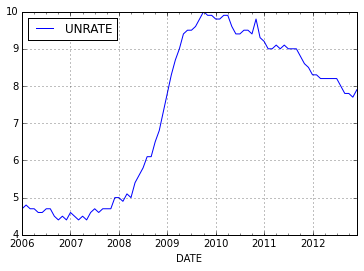

In [22]:
data.plot()

# Exercise

In [46]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               }

In [47]:
start = dt.datetime(2015,1,1)
end = dt.datetime.today()

In [48]:
price_change = {}

In [49]:
for ticker in ticker_list:
    prices = web.DataReader(ticker, 'yahoo', start, end)
    closing_price = prices['Close']
    change = 100*(closing_price[-1]-closing_price[0])/closing_price[0]
    name = ticker_list[ticker]
    price_change[name] = change

In [50]:
pc = pd.Series(price_change)
pc.sort()

In [51]:
pc

Intel       -20.187021
IBM         -10.829324
Coca-Cola    -7.498811
Microsoft    -7.014538
Toyota       -5.450782
Apple         3.768403
Boeing        4.724894
Google       19.899986
Amazon       75.113454
dtype: float64

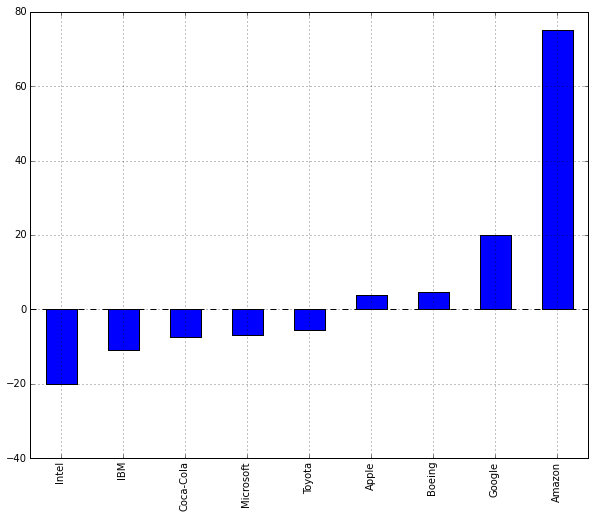

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
pc.plot(kind='bar', ax=ax)